In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('train_demand_forecasting.csv')
df.head()


,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [3]:
df[['date', 'month', 'year']] = df['week'].str.split('/', expand=True)
df.head()


,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,date,month,year
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52,17,01,11


In [4]:
df = df.drop('week', axis=1)
df.head()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,date,month,year
0,1,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,2,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,3,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,4,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,5,8091,217390,141.0750,141.0750,0,0,52,17,01,11


In [5]:
# As recoed_ID feature is not contributing in our solution, lets remove it
df = df.drop('record_ID', axis=1)
df.head()

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,date,month,year
0,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,8091,217390,141.0750,141.0750,0,0,52,17,01,11


In [6]:
X, y = df.drop('units_sold', axis= 1), df['units_sold']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train, y_train


(        store_id  sku_id  total_price  base_price  is_featured_sku  \
 147346      9456  216419      86.9250     86.9250                0   
 20252       9425  216419      84.0750     84.0750                0   
 29262       9112  219009     224.4375    224.4375                0   
 73300       9281  216418      85.5000     85.5000                0   
 83910       9532  398721     469.5375    469.5375                0   
 ...          ...     ...          ...         ...              ...   
 119879      9789  547934     170.2875    170.2875                0   
 103694      9770  245387     355.5375    469.5375                0   
 131932      8555  216418      69.8250     88.3500                0   
 146867      8319  222765     177.4125    239.4000                1   
 121958      9479  219009     191.6625    191.6625                0   
 
         is_display_sku date month year  
 147346               0   25    06   13  
 20252                0   16    05   11  
 29262              

In [9]:
y_test

,units_sold
144782,41
117,13
77408,339
62193,14
143901,4
...,...
146710,17
55307,90
119838,180
102935,17


In [10]:
model1 = RandomForestRegressor(n_jobs=-1)
model1.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [11]:
# This will give us value for r2 error
model1.score(X_test, y_test)

0.7754923905928504

In [12]:
from sklearn.metrics import root_mean_squared_error

y_pred = model1.predict(X_test)

In [13]:
rmse = root_mean_squared_error(y_test, y_pred)
rmse

27.14107202524102

In [14]:
# Now lets see the distribution, how it looks like
df.units_sold.describe()


,units_sold
count,150150.000000
mean,51.674206
std,60.207904
min,1.000000
25%,20.000000
50%,35.000000
75%,62.000000
max,2876.000000


<Axes: >

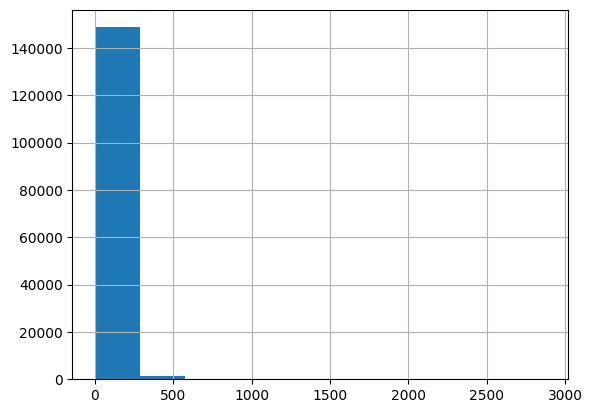

In [15]:
df.units_sold.hist()

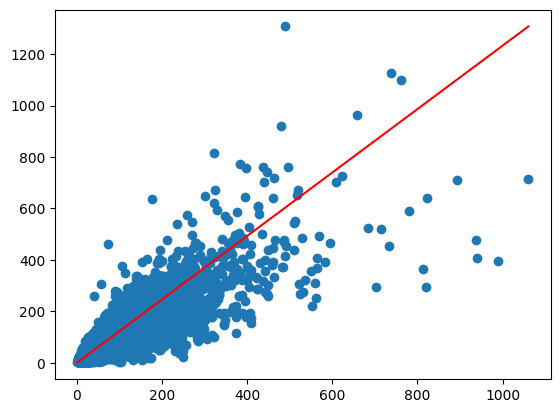

In [16]:
plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(), y_test.max()), color='red')

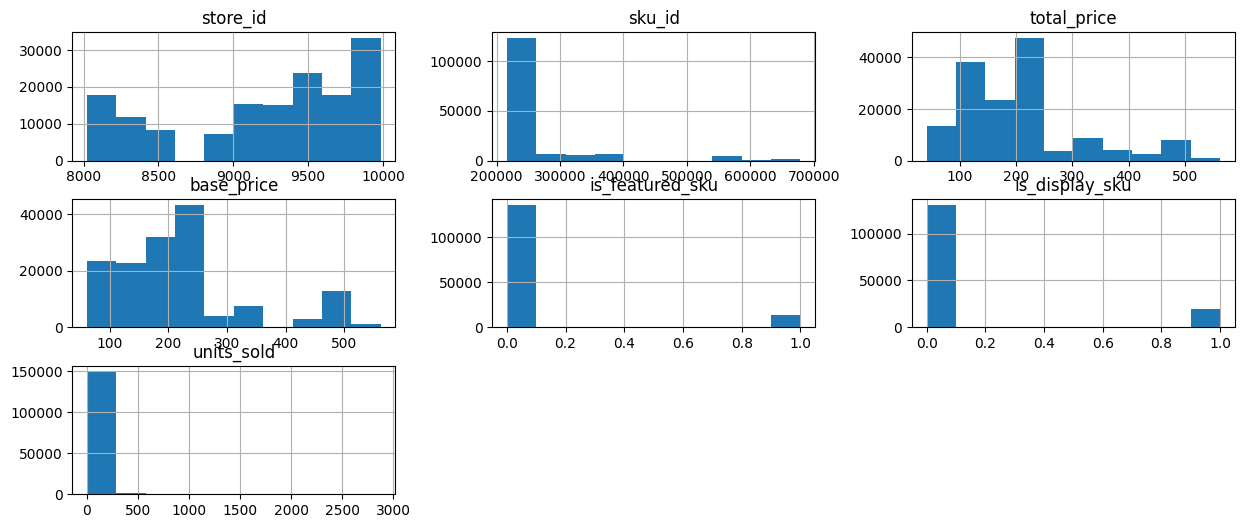

In [17]:
df.hist(figsize=(15, 6))
plt.show()

In [18]:
# lets see how many stores we have
len(df.store_id.unique())

76

In [19]:
# and products are
len(df.sku_id.unique())

28

In [20]:
# lets see how 99percentile of units_sold is,
df.units_sold.quantile(0.99)

np.float64(283.0)

<Axes: >

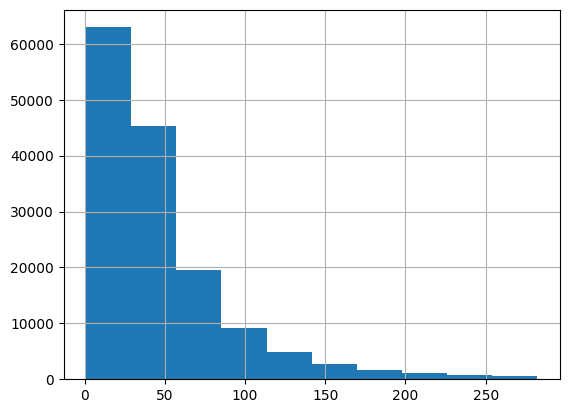

In [21]:
df = df[df.units_sold < df.units_sold.quantile(0.99)]
df.units_sold.hist()

In [22]:
# Now lets convert columns sku_id & store_id in one-hot-encoding
df = df.join(pd.get_dummies(df.store_id, prefix='store')).drop('store_id', axis=1)
df = df.join(pd.get_dummies(df.sku_id, prefix='item')).drop('sku_id', axis=1)


In [23]:
df

,total_price,base_price,is_featured_sku,is_display_sku,units_sold,date,month,year,store_8023,store_8058,...,item_320485,item_327492,item_378934,item_398721,item_545621,item_546789,item_547934,item_600934,item_673209,item_679023
0,99.0375,111.8625,0,0,20,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
1,99.0375,99.0375,0,0,28,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
2,133.9500,133.9500,0,0,19,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
3,133.9500,133.9500,0,0,44,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
4,141.0750,141.0750,0,0,52,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,235.8375,235.8375,0,0,38,09,07,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150146,235.8375,235.8375,0,0,30,09,07,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150147,357.6750,483.7875,1,1,31,09,07,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150148,141.7875,191.6625,0,1,12,09,07,13,False,False,...,False,False,False,False,False,False,True,False,False,False


In [24]:
X, y = df.drop('units_sold', axis= 1), df['units_sold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model2 = RandomForestRegressor(n_jobs=-1)
model2.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [25]:
model2.score(X_test, y_test)

0.8267448851866934

In [26]:
y_pred2 = model2.predict(X_test)
rmse2 = root_mean_squared_error(y_test, y_pred2)
rmse2

17.767717226399633

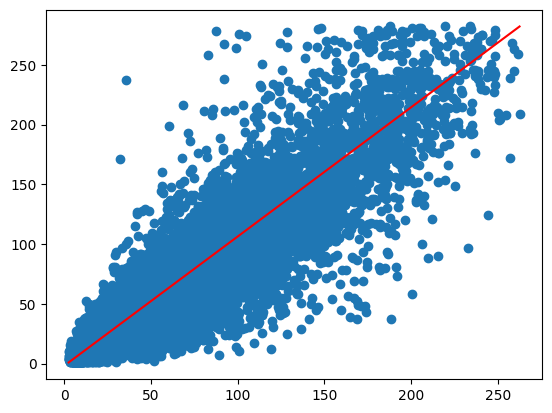

In [27]:
plt.scatter(y_pred2, y_test)
plt.plot(np.linspace(y_pred2.min(), y_pred2.max()), np.linspace(y_test.min(), y_test.max()), color='red')

In [30]:
# Now lets try doing HyperParameter Tuning, here using the GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':[10, 20 ],
    'max_depth':[10, 20],
    'min_samples_split':[2, 5]
}

model3 = RandomForestRegressor()
grid_search = GridSearchCV(estimator=model3, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_split': [2, 5],
                         'n_estimators': [10, 20]},
             verbose=2)

In [31]:
best_model = grid_search.best_estimator_
best_model

RandomForestRegressor(max_depth=20, n_estimators=20)

In [32]:
grid_search.best_params_

{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 20}